### I- Read the dataset file “Cancer.csv” (from github using the following command), and assign it to a Pandas DataFrame:

In [2]:
# Importing the required packages and libraries
# we will need numpy and pandas later

import numpy as np
import pandas as pd

In [3]:
# reading a CSV file directly from Web, and store it in a pandas DataFrame:
# "read_csv" is a pandas function to read csv files from web or local device:

df  = pd.read_csv("https://github.com/mpourhoma/CS4662/raw/master/Cancer.csv")

#### Check out the dataset. As you see, the dataset includes 9 numerical features. The last column is the binary label (“1” means it is a malignant cancer, “0” means it is a benign   tumor). You will use all 9 features in this homework.

In [4]:
# display the first 5 rows (default) of Dataframe data:

df.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Malignant_Cancer
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [5]:
print(df.columns)

Index(['Clump_Thickness', 'Uniformity_of_Cell_Size',
       'Uniformity_of_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Malignant_Cancer'],
      dtype='object')


II- Use sklearn functions to split the dataset into testing and training sets with the following parameters: test_size=0.3, random_state=2.

In [6]:
# Creating the Feature Matrix for the dataset:

# create a python list of feature names that would like to pick from the dataset:
#feature_cols = ['sepal_length','sepal_width','petal_length','petal_width']

feature_cols = ['Clump_Thickness', 'Uniformity_of_Cell_Size',
       'Uniformity_of_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses']


# use the above list to select the features from the original DataFrame
X = df[feature_cols]
y = df['Malignant_Cancer']
X

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
145,3,1,1,1,2,1,2,1,1
146,9,7,7,5,5,10,7,8,3
147,10,8,8,4,10,10,8,1,1
148,1,1,1,1,2,1,3,1,1


In [7]:
# Randomly splitting the original dataset into training set and testing set
# The function"train_test_split" from "sklearn.cross_validation" library performs random splitting.
# "test_size=0.3" means that pick 30% of data samples for testing set, and the rest (70%) for training set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

III- Use “Decision Tree Classifier” to predict Cancer based on the training/testing datasets that you built in part (II). Use this command to define your tree: my_DecisionTree = DecisionTreeClassifier(random_state=2).

In [8]:
# The following line will import DecisionTreeClassifier "Class"
# DecisionTreeClassifier is name of a "sklearn class" to perform "Decision Tree Classification" 

from sklearn.tree import DecisionTreeClassifier

In [9]:
# In the following line, "my_decisiontree" is instantiated as an "object" of DecisionTreeClassifier "class". 

my_decisiontree = DecisionTreeClassifier(random_state=2)

# We can use the method "fit" of the "object my_decisiontree" along with training dataset and labels to train the model.

my_decisiontree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2)

In [10]:
# print the size of the traning set:
print(X_train.shape)
print(y_train.shape)

(105, 9)
(105,)


In [11]:
# print the size of the testing set:
print(X_test.shape)
print(y_test.shape)

(45, 9)
(45,)


In [12]:
# Testing on the testing set:

y_predict = my_decisiontree.predict(X_test)

print(y_predict)

[0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0
 1 1 0 1 1 0 1 1]


#### Then, calculate and report the accuracy and AUC of your classifier. Later in part (VII), you will plot the ROC curve as well.

In [13]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn import metrics


# Estimating the probability (likelihood) of Each Label: 
y_predict_prob = my_decisiontree.predict_proba(X_test)[:,1]

# This line prints the "predicted label" for the testing set:
print(y_predict)

[0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0
 1 1 0 1 1 0 1 1]


In [14]:
# Calculate ROC curve
single_tree_fpr, single_tree_tpr, thresholds = roc_curve(y_test, y_predict_prob)

# Calculate AUC
AUC_Single_Decision_Tree = metrics.auc(single_tree_fpr, single_tree_tpr)

# Calculate accuracy
single_tree_accuracy = accuracy_score(y_test, y_predict)

# Report the results
print("Single Tree Accuracy:", single_tree_accuracy)
print("Single Tree AUC:", AUC_Single_Decision_Tree)

Single Tree Accuracy: 0.8666666666666667
Single Tree AUC: 0.8697478991596639


IV- Now, we want to perform “Bagging” based on 29 “base decision tree classifiers”. Note: you should write your own code to perform Bagging (don’t use scikit-learn functions for Bagging!)

To do so, you need to perform bootstrapping first. You can write a “for” loop with loop variable i=0…28.  In each iteration of the loop, you have to:

1. make a bootstarp sample of the original “Training” Dataset (build in part(II)) with size of bootstarp_size = 0.8*(Size of the original dataset). 

2. Define and train a new base decision tree classifier on this dataset in each iteration:

Base_DecisionTree = DecisionTreeClassifier(random_state=2).

3. Perform prediction “this base classifier” on the original “Testing” Dataset build in part(II), and save the prediction results for all testing samples.

Then, Perform Voting to make the final decision on each data sample based on the votes of all 29 classifiers. Finally, calculate and report the Accuracy and AUC of your Bagging method. 

In [15]:
from sklearn.utils import resample

base_decision_tree_classifiers = []

bootstrap_size = 0.8*len(X_train)

predictions = []

for i in range(29): 
       X_bootstrap, Y_bootstrap = resample(X_train, y_train, n_samples = int(bootstrap_size) , random_state=i , replace = True)
       
       base_decision = DecisionTreeClassifier(random_state=2)
       base_decision.fit(X_bootstrap, Y_bootstrap)
       
       prediction = base_decision.predict(X_test)
       
       predictions.append(prediction)
print(predictions)

[array([0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1], dtype=int64), array([0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1], dtype=int64), array([0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1], dtype=int64), array([0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1], dtype=int64), array([0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1], dtype=int64), array([0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1

In [16]:
votes = [None]*len(predictions[0])
probability = [None] * len(predictions[0])

for i in range(len(predictions[0])): 
       benign = 0
       malignant = 0
       for idx in range(len(predictions)):
              if predictions[idx][i] == 0:
                     benign += 1
              else:
                     malignant+= 1
                  
       if benign > malignant:
              res = 0
       else:
              res = 1
       votes[i] = res
       probability[i] = malignant/len(predictions[0])
print(votes)
print(probability)

[0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1]
[0.044444444444444446, 0.6444444444444445, 0.6444444444444445, 0.5555555555555556, 0.5111111111111111, 0.6444444444444445, 0.5777777777777777, 0.5555555555555556, 0.0, 0.24444444444444444, 0.6222222222222222, 0.6222222222222222, 0.6444444444444445, 0.6444444444444445, 0.4222222222222222, 0.37777777777777777, 0.0, 0.4222222222222222, 0.0, 0.5111111111111111, 0.0, 0.0, 0.0, 0.24444444444444444, 0.35555555555555557, 0.6444444444444445, 0.022222222222222223, 0.0, 0.0, 0.5111111111111111, 0.0, 0.6444444444444445, 0.6444444444444445, 0.0, 0.6, 0.28888888888888886, 0.35555555555555557, 0.4, 0.6, 0.0, 0.6444444444444445, 0.6444444444444445, 0.0, 0.6444444444444445, 0.6444444444444445]


In [17]:
from sklearn import metrics

# calculating accuracy
bagging_score = accuracy_score(y_test, votes)
print("Accuracy: " + str(bagging_score))

# Calculate ROC curve
fpr_bagging, tpr_bagging, thresholds = roc_curve(y_test, probability)

# Calculate AUC
AUC_Bagging = metrics.auc(fpr_bagging, tpr_bagging)
print("AUC Bagging: " + str(AUC_Bagging))

Accuracy: 0.9111111111111111
AUC Bagging: 0.9380252100840336


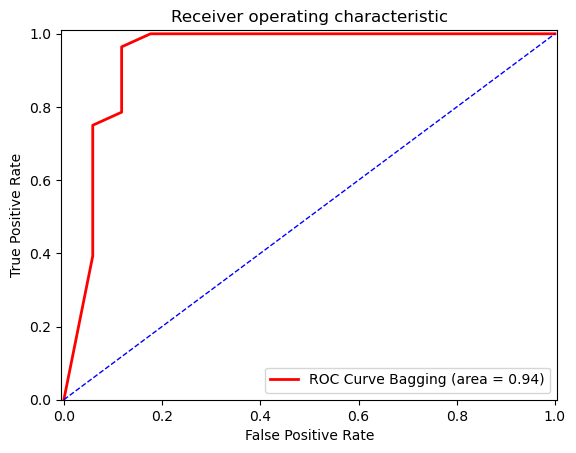

In [18]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr_bagging, tpr_bagging, color='red', lw=2, 
         label='ROC Curve Bagging (area = %0.2f)' % AUC_Bagging)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

V- Use scikit-learn “Adaboost” classifier to predict Cancer based on the training/testing datasets that you built in part (b). Then, calculate and report the accuracy and AUC of your classifier.

In [19]:
from sklearn.ensemble import AdaBoostClassifier

my_AdaBoost = AdaBoostClassifier(n_estimators = 29,random_state=2)

my_AdaBoost.fit(X_train, y_train)

ada_predictions = my_AdaBoost.predict(X_test)

ada_score = accuracy_score(y_test, ada_predictions)

print("Accuracy for AdaBoost: " + str(ada_score))

Accuracy for AdaBoost: 0.9555555555555556


In [20]:
# Calculate ROC curve
ADA_prob = my_AdaBoost.predict_proba(X_test)

fpr_ada, tpr_ada, thresholds = roc_curve(y_test, ADA_prob[:,1])

# Calculate AUC
AUC_ADA = metrics.auc(fpr_ada, tpr_ada)
print("AUC ADA: " + str(AUC_ADA))

AUC ADA: 0.9611344537815125


VI- In this section, we use another decision tree boosting technique called "gradient boosting" with its very popular and super efficient implementation “XGBoost” that stands for "Extreme Gradient Boosting." This algorithm is not included in sklearn, so you need to install the XGBoost library.

In [21]:
from xgboost import XGBClassifier

my_XGBoost = XGBClassifier(n_estimators = 29,random_state=2)

my_XGBoost.fit(X_train, y_train)

XGBoost_predictions = my_XGBoost.predict(X_test)

XGBoost_score = accuracy_score(y_test, XGBoost_predictions)

print("Accuracy for XGBoost: " + str(XGBoost_score))

Accuracy for XGBoost: 0.9555555555555556


Repeat part (e) with XGBoost. 

In [22]:
# Calculate ROC curve
XGBoost_prob = my_XGBoost.predict_proba(X_test)

fpr_xgboost, tpr_xgboost, thresholds = roc_curve(y_test, XGBoost_prob[:,1])

# Calculate AUC
AUC_XGBoost = metrics.auc(fpr_xgboost, tpr_xgboost)
print("XGBoost AUC: " + str(AUC_XGBoost))

XGBoost AUC: 0.963235294117647


VII- Use scikit-learn “Random Forest” classifier to predict Cancer based on the training/testing datasets that you built in part (II). Then, calculate and report the accuracy and AUC of your classifier.

In [23]:
from sklearn.ensemble import RandomForestClassifier

my_RandomForest = RandomForestClassifier(n_estimators = 29, bootstrap = True, random_state=2)

my_RandomForest.fit(X_train, y_train)

my_RandomForest_predictions = my_RandomForest.predict(X_test)

my_RandomForest_score = accuracy_score(y_test, my_RandomForest_predictions)

print("Accuracy for Random Forest: " + str(my_RandomForest_score))

Accuracy for Random Forest: 0.9555555555555556


In [24]:
# Calculate ROC curve
RandomForest_prob = my_RandomForest.predict_proba(X_test)

fpr_RandomForest, tpr_RandomForest, thresholds = roc_curve(y_test, RandomForest_prob[:,1])

# Calculate AUC
AUC_RandomForest = metrics.auc(fpr_RandomForest, tpr_RandomForest)
print("Random Forest AUC: " + str(AUC_RandomForest))

Random Forest AUC: 0.9516806722689075


VIII- Now, plot the ROC curves of your algorithms in parts (III), (IV), (V), (VI), (VII) in a single plane with different colors along with the name of each method. Show the AUCs on the graph as well.

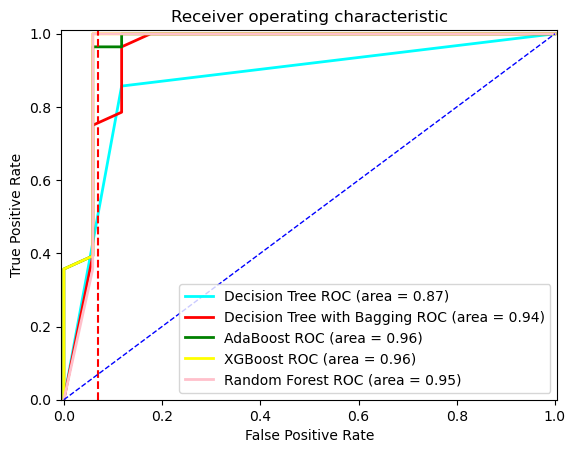

In [25]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than opening a new figure window:
%matplotlib inline

plt.figure()

# Roc single tree Curve:
plt.plot(single_tree_fpr, single_tree_tpr, color='cyan', lw=2, 
         label='Decision Tree ROC (area = %0.2f)' % AUC_Single_Decision_Tree)

# Roc Bagging Curve:
plt.plot(fpr_bagging, tpr_bagging, color='red', lw=2, 
         label='Decision Tree with Bagging ROC (area = %0.2f)' % AUC_Bagging)

# Roc ada Curve:
plt.plot(fpr_ada, tpr_ada, color='green', lw=2, 
         label='AdaBoost ROC (area = %0.2f)' % AUC_ADA)

# Roc xgboost Curve:
plt.plot(fpr_xgboost, tpr_xgboost, color='yellow', lw=2, 
         label='XGBoost ROC (area = %0.2f)' % AUC_XGBoost)

# Roc random forest Curve:
plt.plot(fpr_RandomForest, tpr_RandomForest, color='pink', lw=2, 
         label='Random Forest ROC (area = %0.2f)' % AUC_RandomForest)

plt.axvline(x=0.07, color='red', linestyle='--')

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

In [26]:
# Report the results
print("Single Tree Accuracy:", single_tree_accuracy)
print("Single Tree AUC:", AUC_Single_Decision_Tree)
print("\n")
# calculating accuracy
print("Bagging Accuracy: " + str(bagging_score))
print("AUC Bagging: " + str(AUC_Bagging))
print("\n")

print("Accuracy for AdaBoost: " + str(ada_score))
print("AUC ADA: " + str(AUC_ADA))
print("\n")

print("Accuracy for XGBoost: " + str(XGBoost_score))
print("XGBoost AUC: " + str(AUC_XGBoost))
print("\n")

print("Accuracy for Random Forest: " + str(my_RandomForest_score))
print("Random Forest AUC: " + str(AUC_RandomForest))

Single Tree Accuracy: 0.8666666666666667
Single Tree AUC: 0.8697478991596639


Bagging Accuracy: 0.9111111111111111
AUC Bagging: 0.9380252100840336


Accuracy for AdaBoost: 0.9555555555555556
AUC ADA: 0.9611344537815125


Accuracy for XGBoost: 0.9555555555555556
XGBoost AUC: 0.963235294117647


Accuracy for Random Forest: 0.9555555555555556
Random Forest AUC: 0.9516806722689075


Which algorithm is the best w.r.t the AUC value? 
XGBoost is the best since it has the highest AUC of 96.32% followed closely by AdaBoost which has AUC of 96.11%

Which algorithm is the best w.r.t the Accuracy value?
AdaBoost, XGBoost, and Random Forest all were equal in accuracy.

Which algorithm is the best when we want a False Positive Rate of %7?
Random forest and XGBoost would be the best models for 7% FPR since they both have a 100% TPR at that FPR.